In [1]:
folder_name = '../../data/variant_filtering/missing'
# read files that have '.nmiss.bed' extension in folder as a list
import os
files = [f for f in os.listdir(folder_name) if f.endswith('.nmiss.bed')]

In [2]:
# read the first 3 columns of one of the files (they are the same for all files)
import pandas as pd
bed = pd.read_csv(folder_name + '/' + files[0], sep='\t', header=None, usecols=[0,1,2])

In [3]:
def get_val_counts(pop):
    file = folder_name + '/' + pop + '.nmiss.bed'
    nmiss = pd.read_csv(file, sep='\t', header=None, usecols=[3], names=[pop])
    val_counts = pd.DataFrame(nmiss.value_counts(sort=False)).reset_index()
    # rename the column named like pop to 'missing_gts'
    val_counts = val_counts.rename(columns={pop: 'missing_gts'})
    val_counts['prop_samples'] = val_counts['missing_gts'] / max(val_counts['missing_gts'])
    val_counts['Freq_prop'] = val_counts['count'] / len(bed)
    val_counts['Freq_cumsum'] = val_counts['Freq_prop'].cumsum()
    return val_counts

In [4]:
valcounts_list = [get_val_counts(pop) for pop in ['lpa', 'sel', 'wel', 'eel']]

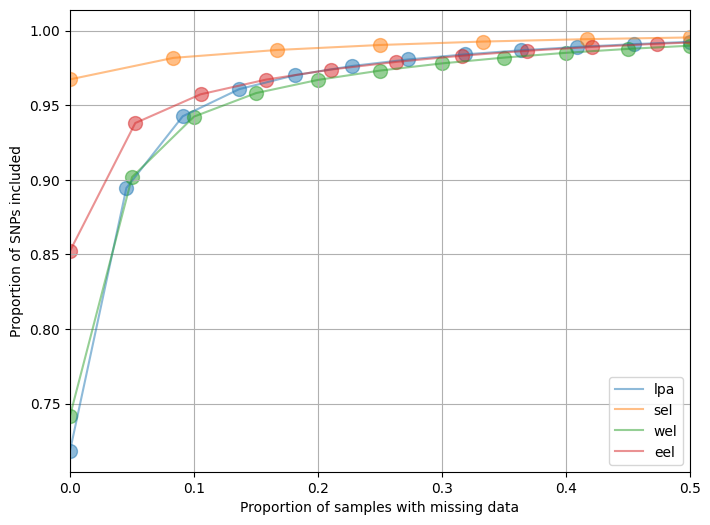

In [39]:
def plot_valcounts(valcounts_list):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    for val_counts, pop in zip(valcounts_list, ['lpa', 'sel', 'wel', 'eel']):
        plt.plot(val_counts['prop_samples'], val_counts['Freq_cumsum'], alpha=0.5, linewidth=1.5, label=pop)
        plt.scatter(val_counts['prop_samples'], val_counts['Freq_cumsum'], alpha=0.5, s=100, marker='o')
    plt.xlim(0, 0.5)
    plt.xlabel('Proportion of samples with missing data')
    plt.ylabel('Proportion of SNPs included')
    plt.legend()
    plt.grid(True)
plot_valcounts(valcounts_list)

In [38]:
def print_stats(valcounts_list):
    for val_counts, pop in zip(valcounts_list, ['lpa', 'sel', 'wel', 'eel']):
        minmiss = val_counts[val_counts["prop_samples"]>0.2]["missing_gts"].iloc[0]
        misssnps = (sum(val_counts["count"].iloc[minmiss+1:]))
        percmiss = round(val_counts["Freq_cumsum"].iloc[minmiss]*100, 3)
        print(f'{pop}: {misssnps} SNPs have more than 20% (>{minmiss} samples) missing genotypes ({percmiss}% of total SNPs)')
print_stats(valcounts_list)

lpa: 164083 SNPs have more than 20% (>5 samples) missing genotypes (97.635% of total SNPs)
sel: 66331 SNPs have more than 20% (>3 samples) missing genotypes (99.044% of total SNPs)
wel: 185354 SNPs have more than 20% (>5 samples) missing genotypes (97.328% of total SNPs)
eel: 180494 SNPs have more than 20% (>4 samples) missing genotypes (97.398% of total SNPs)


In [74]:
bed = pd.read_csv(folder_name + '/' + files[1], sep='\t', header=None, usecols=[0,1,2,3])
filtered_bed = bed[bed[3]>minmiss]


'eel.nmiss.bed'

4


,0,1,2,3
16,mLynRuf2.2_ChrA1,1513,1514,7
87,mLynRuf2.2_ChrA1,22778,22779,11
206,mLynRuf2.2_ChrA1,34307,34308,5
208,mLynRuf2.2_ChrA1,35082,35083,12
260,mLynRuf2.2_ChrA1,36312,36313,16
...,...,...,...,...
6936222,mLynRuf2.2_ChrF2,83741552,83741553,6
6937123,mLynRuf2.2_ChrF2,83809875,83809876,6
6937124,mLynRuf2.2_ChrF2,83809877,83809878,6
6937650,mLynRuf2.2_ChrF2,83893980,83893981,11
